In [1]:
import data_loader
import torch
from torch.utils.data import DataLoader
from pathlib import Path
from PIL import Image
from torchvision.transforms import v2 as transforms


## Dataset

In [2]:
# Defines the path to the folder with data in it
train_dir = Path("mbrimberry_files\Submissions")

In [3]:
# Makes transforms and loads the datasets form the directories
trans = transforms.Compose(
    [
        transforms.ToImage(),
        transforms.ToDtype(torch.float32, scale=True),
        transforms.Resize(size=(1056,816))
    ])
desk_data = data_loader.IndividualIMGDataset(targ_dir=train_dir,transform=trans, type = "desk")
packet_data = data_loader.IndividualIMGDataset(targ_dir=train_dir,transform=trans,type = "packet")
caddy_data = data_loader.IndividualIMGDataset(targ_dir=train_dir,transform=trans,type = "caddy")


In [4]:
# The image is represented as a big tensor
# The labels and boxes are in a list which is returned second
packet_data[2]

(Image([[[0.3333, 0.3294, 0.3294,  ..., 0.8510, 0.8510, 0.8549],
         [0.3294, 0.3294, 0.3294,  ..., 0.8471, 0.8471, 0.8510],
         [0.3373, 0.3333, 0.3333,  ..., 0.8392, 0.8431, 0.8510],
         ...,
         [0.6353, 0.6353, 0.6275,  ..., 0.7569, 0.7569, 0.7608],
         [0.6314, 0.6353, 0.6353,  ..., 0.7569, 0.7569, 0.7569],
         [0.6353, 0.6314, 0.6353,  ..., 0.7569, 0.7569, 0.7608]],
 
        [[0.1765, 0.1725, 0.1725,  ..., 0.8118, 0.8118, 0.8157],
         [0.1725, 0.1725, 0.1725,  ..., 0.8118, 0.8118, 0.8157],
         [0.1804, 0.1765, 0.1765,  ..., 0.8039, 0.8078, 0.8157],
         ...,
         [0.6118, 0.6118, 0.6039,  ..., 0.7451, 0.7451, 0.7490],
         [0.6039, 0.6078, 0.6118,  ..., 0.7451, 0.7451, 0.7451],
         [0.6078, 0.6039, 0.6118,  ..., 0.7451, 0.7451, 0.7490]],
 
        [[0.0392, 0.0353, 0.0353,  ..., 0.7843, 0.7843, 0.7882],
         [0.0353, 0.0353, 0.0353,  ..., 0.7843, 0.7843, 0.7882],
         [0.0510, 0.0471, 0.0471,  ..., 0.7765, 0.7804, 

## Displaying Dataset
These are a few methods for viewing the displayed data

Keep in mind that this is different then working with data_loader which stores the data in batches

torch.Size([3, 1056, 816])
torch.Size([1056, 816, 3])


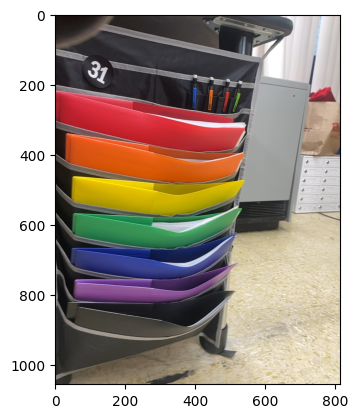

In [5]:
# You can use matplotlib to display the image tensor
import matplotlib.pyplot as plt
image, targets = caddy_data[2]
print(f"{image.shape}")
image_permute = image.permute(1,2,0)
print(f"{image_permute.shape}")
fig, ax = plt.subplots(1)
ax.imshow(image_permute)

In [6]:
# This will return the image and target data for the third datapoint
img, targets = caddy_data[6]

In [7]:
# Image tensor
img

Image([[[0.4549, 0.4784, 0.4667,  ..., 0.2471, 0.2353, 0.2314],
        [0.4392, 0.4549, 0.4549,  ..., 0.2863, 0.3020, 0.2980],
        [0.4353, 0.4353, 0.4196,  ..., 0.2706, 0.3020, 0.3137],
        ...,
        [0.8510, 0.8667, 0.8745,  ..., 0.9647, 0.9647, 0.9686],
        [0.8549, 0.8784, 0.8706,  ..., 0.9647, 0.9647, 0.9647],
        [0.8549, 0.8588, 0.8510,  ..., 0.9608, 0.9647, 0.9647]],

       [[0.4824, 0.5059, 0.4941,  ..., 0.2784, 0.2667, 0.2627],
        [0.4706, 0.4863, 0.4863,  ..., 0.3176, 0.3333, 0.3216],
        [0.4667, 0.4667, 0.4510,  ..., 0.2941, 0.3255, 0.3294],
        ...,
        [0.7725, 0.7882, 0.7961,  ..., 0.9725, 0.9725, 0.9725],
        [0.7765, 0.8000, 0.7922,  ..., 0.9686, 0.9686, 0.9686],
        [0.7765, 0.7804, 0.7725,  ..., 0.9647, 0.9686, 0.9686]],

       [[0.5490, 0.5725, 0.5608,  ..., 0.2902, 0.2784, 0.2745],
        [0.5294, 0.5451, 0.5451,  ..., 0.3216, 0.3373, 0.3255],
        [0.5255, 0.5255, 0.5098,  ..., 0.2980, 0.3294, 0.3373],
        ..

In [8]:
# Coordinates for bounding boxes
# They are in center x, center y, width, heigh format
# The values go from 0.0 to 1.0 and go propotinal to the page (EX: 1.0 for x would mean center of the box is all the way to the right of the image)
targets["boxes"]

tensor([[0.3143, 0.2888, 0.1336, 0.0852]])

In [9]:
# These labels are based on the class.txt file. 0 referes to the first entry and 1 refers to the second entry. 
targets["labels"]

[0]

In [10]:
#Amount of desk images
len(desk_data)

221

In [11]:
# Amount of packet images
len(packet_data)

611

In [12]:
# These are the classes the correspond with 0 and 1 for the desk and packet data
desk_data.classes, packet_data.classes,caddy_data.classes

(['Calculator', 'Desk number'], ['ID', 'Period'], ['Caddy number'])

In [13]:
print(packet_data.class_to_idx)
print(desk_data.class_to_idx)
print(caddy_data.class_to_idx)

{'ID': 0, 'Period': 1}
{'Calculator': 0, 'Desk number': 1}
{'Caddy number': 0}


In [ ]:
# This slider shows all of the images in the desk dataset with there bounding boxes
import ipywidgets as widgets
from IPython.display import display

# Display an image and its prediction
def display_prediction(index):
    image, targets = desk_data[index]
    bimg = data_loader.DrawBox(image,targets["boxes"],targets["labels"])
    image_permute = bimg.permute(1,2,0)
    plt.imshow(image_permute)
    plt.show()

# Slider widget (use the slider below)
slider = widgets.IntSlider(value=0, min=0, max=len(desk_data)-1, step=1, description='Index:')
widgets.interactive(display_prediction, index=slider)

interactive(children=(IntSlider(value=0, description='Index:', max=220), Output()), _dom_classes=('widget-inte…

In [15]:
# Display an image and its prediction
def display_dataset_crop(index):
    plt.clf()
    image, targets = desk_data[index]
    cropped_image = data_loader.CropBox(image,targets["boxes"][1])
    image_permutes = cropped_image.permute(1,2,0)
    plt.imshow(image_permutes)
    plt.show()
    plt.close()
    

# Slider widget (use the slider below)
slider = widgets.IntSlider(value=0, min=0, max=len(desk_data)-1, step=1, description='Index:')
widgets.interactive(display_dataset_crop, index=slider)

interactive(children=(IntSlider(value=0, description='Index:', max=220), Output()), _dom_classes=('widget-inte…

In [16]:
# This slider shows all of the images in the packet dataset with there bounding boxes
import ipywidgets as widgets
from IPython.display import display

# Display an image and its prediction
def display_prediction(index):
    image, targets = packet_data[index]
    bimg = data_loader.DrawBox(image,targets["boxes"],targets["labels"])
    image_permute = bimg.permute(1,2,0)
    plt.imshow(image_permute)
    plt.show()

# Slider widget (use the slider below)
slider = widgets.IntSlider(value=0, min=0, max=len(packet_data)-1, step=1, description='Index:')
widgets.interactive(display_prediction, index=slider)

interactive(children=(IntSlider(value=0, description='Index:', max=610), Output()), _dom_classes=('widget-inte…

## Dataloader

This section puts the dataset into the dataloader and we look at the data in a batch

In [17]:
BATCH_SIZE= 32
NUM_WORKERS = 0

dataloader = DataLoader(dataset=packet_data,
                        batch_size=BATCH_SIZE,
                        collate_fn=data_loader.collate_fn,
                        num_workers=NUM_WORKERS,
                        shuffle=False)

In [18]:
dataloader_desk = DataLoader(dataset=desk_data,
                        batch_size=BATCH_SIZE,
                        collate_fn=data_loader.collate_fn,
                        num_workers=NUM_WORKERS,
                        shuffle=False)

In [19]:
# dataloader_caddy = DataLoader(dataset=caddy_data,
#                         batch_size=BATCH_SIZE,
#                         collate_fn=data_loader.collate_fn,
#                         num_workers=NUM_WORKERS,
#                         shuffle=False)

In [20]:
#To look at a batch you can use this
img, targets = next(iter(dataloader_desk))

In [21]:
# A for loop that goes through all the batches
# Might need to use this for CNN
# This tests all data for all batches
#
# for imgs, targ in dataloader:
#     print(imgs.shape, targ["boxes"].shape, targ["labels"].shape)

In [22]:
targets["boxes"][0]

tensor([[0.7420, 0.4659, 0.0870, 0.1098],
        [0.6734, 0.1155, 0.2047, 0.1799]])

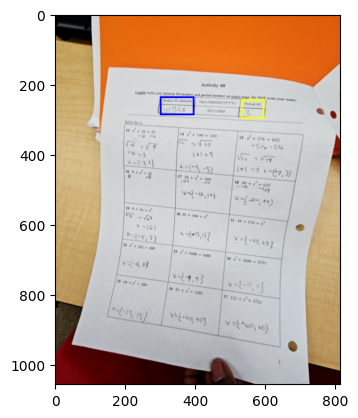

In [23]:
img, targets = next(iter(dataloader))
from torchvision.utils import draw_bounding_boxes
bimg = data_loader.DrawBox(img[4],targets["boxes"][4],targets["labels"][4])
image_permute = bimg.permute(1,2,0)
fig, ax = plt.subplots(1)
ax.imshow(image_permute)

In [24]:
import ipywidgets as widgets
from IPython.display import display

# Display an image and its prediction
def display_prediction(index):
    image, targets = packet_data[index]
    bimg = data_loader.DrawBox(image,targets["boxes"],targets["labels"])
    image_permute = bimg.permute(1,2,0).cpu().numpy()
    plt.imshow(image_permute)
    plt.axis('off')
    plt.show()

# Slider widget (use the slider below)
slider = widgets.IntSlider(value=0, min=0, max=len(packet_data)-1, step=1, description='Index:')
widgets.interactive(display_prediction, index=slider)

interactive(children=(IntSlider(value=0, description='Index:', max=610), Output()), _dom_classes=('widget-inte…

## Displaying Dataloader
This makes the dataset and puts is through a dataloader.
It takes that dataloader extracts a batch from it and uses matplotlib to display it. 

In [25]:
from pathlib import Path
import data_loader
import torch
from torchvision.transforms import v2 as transforms
trans = transforms.Compose(
    [
        transforms.ToImage(),
        transforms.ToDtype(torch.float32, scale=True),
        transforms.Resize(size=(1056,816))
    ])
train_dir = Path("mbrimberry_files\Submissions")

#Can define type to "desk" or "packet" to change dataset
dataloader = data_loader.get_individual_data_loader(targ_dir=train_dir, transform = trans, type = "caddy") 

# turns img and targ to be the batch of the next data
data = iter(dataloader)
img, targ = next(data)
    


In [26]:
targ["labels"][0]

tensor([0])

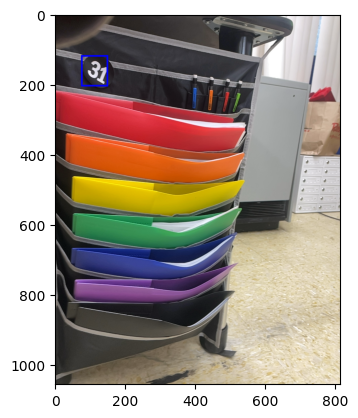

In [27]:
bimg = data_loader.DrawBox(img[2],targ["boxes"][2],targ["labels"][2])
image_permute = bimg.permute(1,2,0)
plt.imshow(image_permute)
plt.show()

In [28]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Display an image and its prediction
def display_prediction(index):
    plt.close()
    bimg = data_loader.DrawBox(img[index],targ["boxes"][index],targ["labels"][index])
    image_permute = bimg.permute(1,2,0)
    plt.imshow(image_permute)
    plt.show()
    

# Slider widget (use the slider below)
slider = widgets.IntSlider(value=0, min=0, max=len(img)-1, step=1, description='Index:')
widgets.interactive(display_prediction, index=slider)

interactive(children=(IntSlider(value=0, description='Index:', max=31), Output()), _dom_classes=('widget-inter…

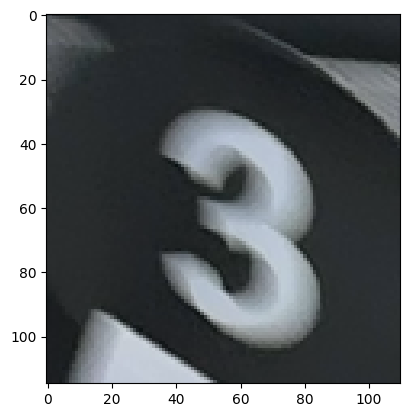

In [29]:
import torchvision.transforms.functional as F
# cropped_image = F.crop(img[0],int(bbox[1] * img.shape[2]),int(bbox[0] * img.shape[3]) ,int(bbox[3] * img.shape[2]),int(bbox[2] * img.shape[3]))
cropped_image = data_loader.CropBox(img[4],targ["boxes"][4][0])
image_permute = cropped_image.permute(1,2,0)
plt.imshow(image_permute)
plt.show()

In [30]:
# Display an image and its prediction
def display_dataloader_crop(index):
    plt.clf()
    cropped_image = data_loader.CropBox(img[index],targ["boxes"][index][1])
    image_permute = cropped_image.permute(1,2,0)
    plt.imshow(image_permute)
    plt.show()
    plt.close()
    

# Slider widget (use the slider below)
slider = widgets.IntSlider(value=0, min=0, max=len(img)-1, step=1, description='Index:')
widgets.interactive(display_dataloader_crop, index=slider)

interactive(children=(IntSlider(value=0, description='Index:', max=31), Output()), _dom_classes=('widget-inter…

<Figure size 640x480 with 0 Axes>

In [31]:
dataloader = data_loader.get_individual_data_loader(targ_dir=train_dir, transform = trans, type = "caddy") 

In [32]:
data = next(iter(dataloader))